/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6 x 4 in image.
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: guidance_scale_3.pdf
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6 x 4 in image.
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: guidance_scale_5.pdf
/tmp/ipykernel_2456/878281806.py:76: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


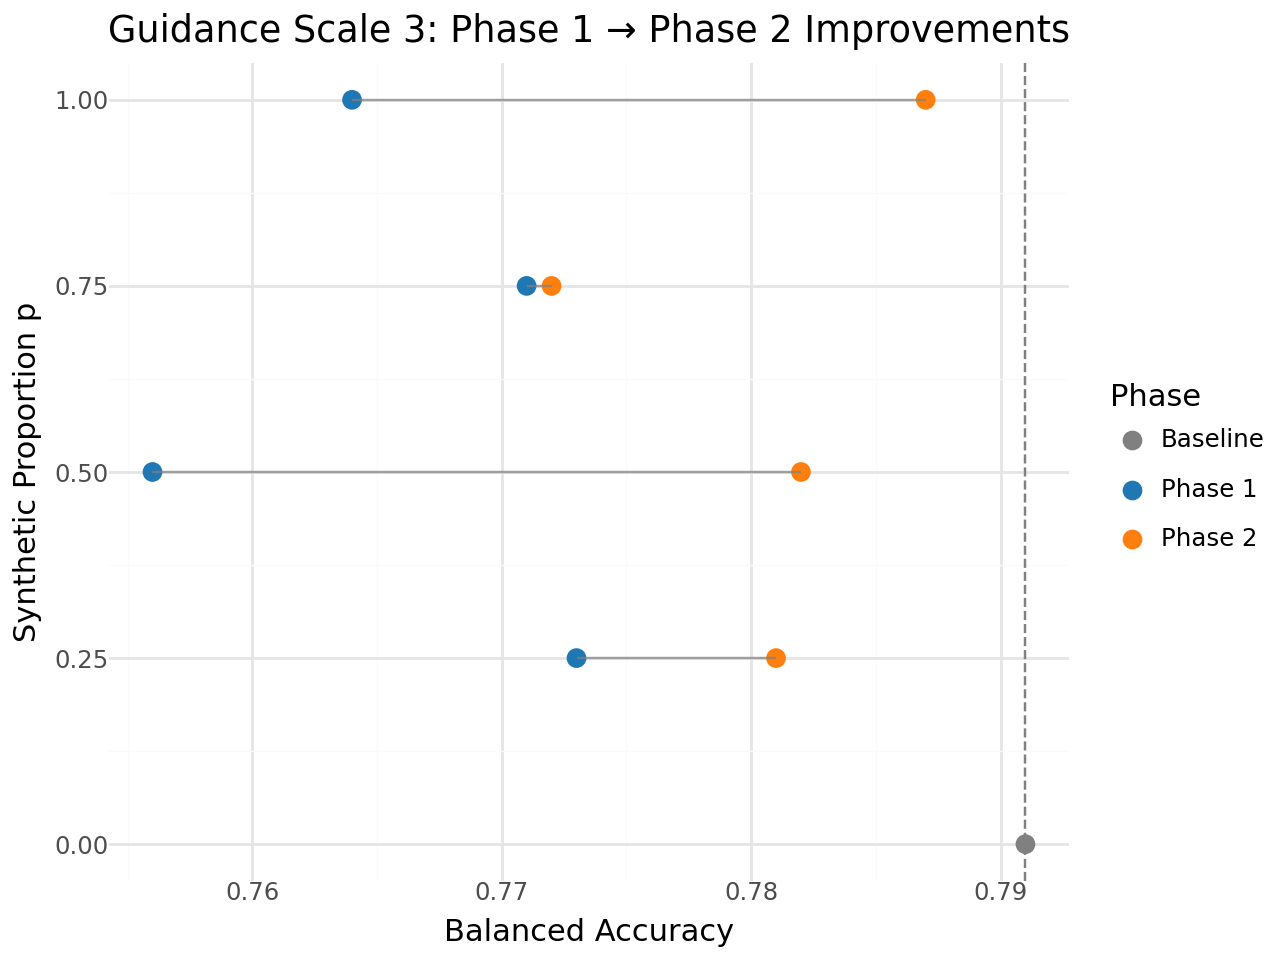

/tmp/ipykernel_2456/878281806.py:77: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


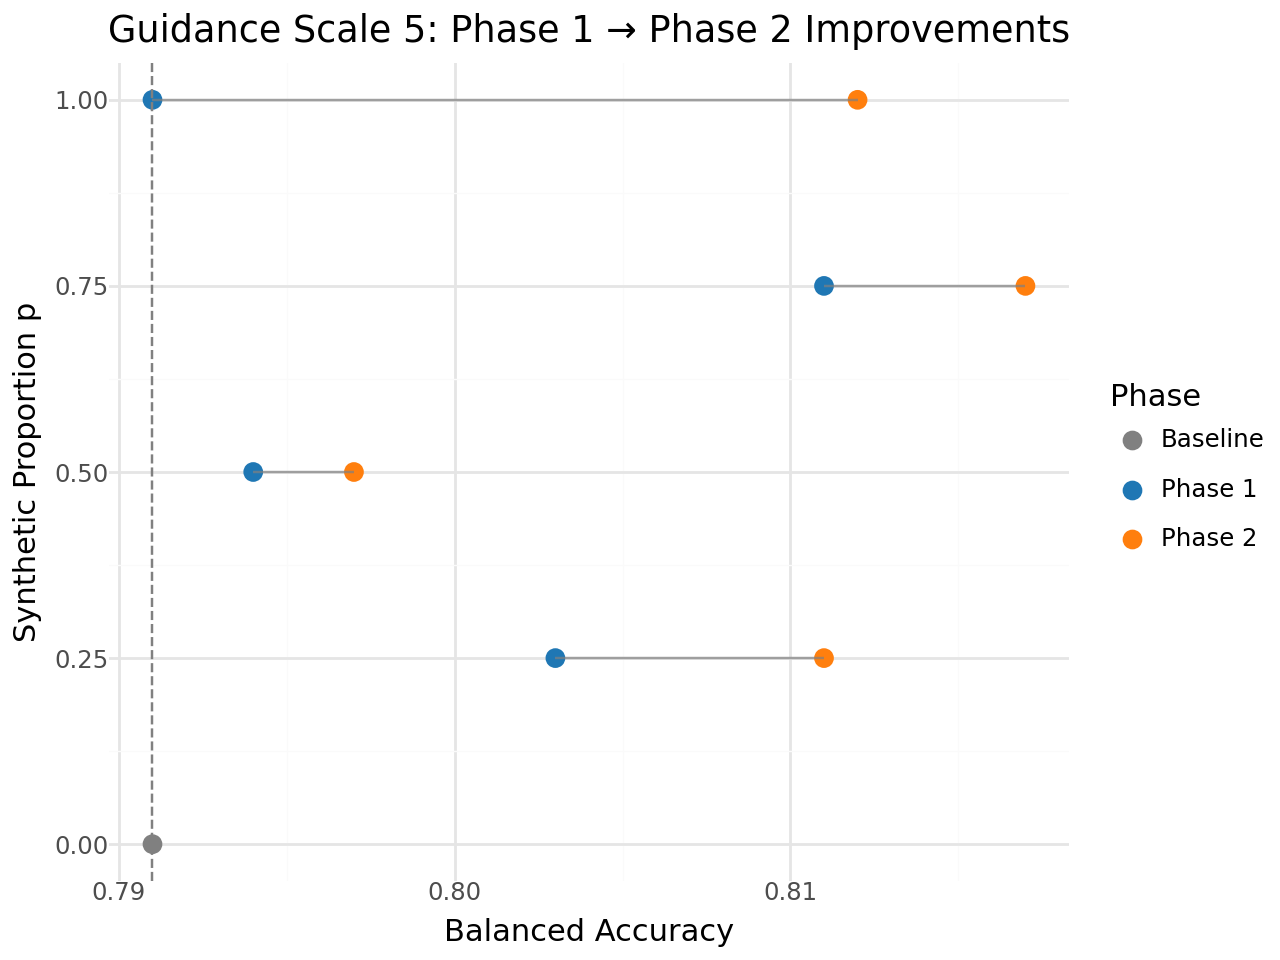

In [5]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_segment, labs, theme_minimal,
    scale_color_manual, geom_vline
)

# Data including baseline (p=0)
data = [
    [3, 0.0, "Baseline", 0.791],
    [5, 0.0, "Baseline", 0.791],

    # G.Scale 3
    [3, 0.25, "Phase 1", 0.773],
    [3, 0.25, "Phase 2", 0.781],
    [3, 0.50, "Phase 1", 0.756],
    [3, 0.50, "Phase 2", 0.782],
    [3, 0.75, "Phase 1", 0.771],
    [3, 0.75, "Phase 2", 0.772],
    [3, 1.0,  "Phase 1", 0.764],
    [3, 1.0,  "Phase 2", 0.787],

    # G.Scale 5
    [5, 0.25, "Phase 1", 0.803],
    [5, 0.25, "Phase 2", 0.811],
    [5, 0.50, "Phase 1", 0.794],
    [5, 0.50, "Phase 2", 0.797],
    [5, 0.75, "Phase 1", 0.811],
    [5, 0.75, "Phase 2", 0.817],
    [5, 1.0,  "Phase 1", 0.791],
    [5, 1.0,  "Phase 2", 0.812],
]

df = pd.DataFrame(data, columns=["GScale", "p", "Phase", "BA"])

# Create line segments (only Phase 1→2, not baseline)
df_segments = (
    df[df["Phase"].isin(["Phase 1","Phase 2"])]
    .pivot(index=["GScale","p"], columns="Phase", values="BA")
    .reset_index()
)

# Colors
colors = {"Baseline": "gray", "Phase 1": "#1f77b4", "Phase 2": "#ff7f0e"}
baseline_value = 0.791

def make_plot(scale):
    df_sub = df[df["GScale"] == scale]
    df_seg_sub = df_segments[df_segments["GScale"] == scale]

    plot = (
        ggplot(df_sub, aes(x="BA", y="p", color="Phase"))
        + geom_point(size=3)
        + geom_segment(
            df_seg_sub,
            aes(x="Phase 1", xend="Phase 2", y="p", yend="p"),
            color="gray", alpha=0.7
        )
        + geom_vline(xintercept=baseline_value, linetype="dashed", color="gray")
        + scale_color_manual(values=colors)
        + labs(
            title=f"Guidance Scale {scale}: Phase 1 → Phase 2 Improvements",
            x="Balanced Accuracy",
            y="Synthetic Proportion p"
        )
        + theme_minimal()
    )
    return plot

# Generate plots
plot_g3 = make_plot(3)
plot_g5 = make_plot(5)

# Save as PDFs
plot_g3.save("guidance_scale_3.pdf", width=6, height=4)
plot_g5.save("guidance_scale_5.pdf", width=6, height=4)
print(plot_g3)
print(plot_g5)



/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 7 x 4.5 in image.
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: guidance_combined.pdf
/tmp/ipykernel_2456/2963880251.py:91: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


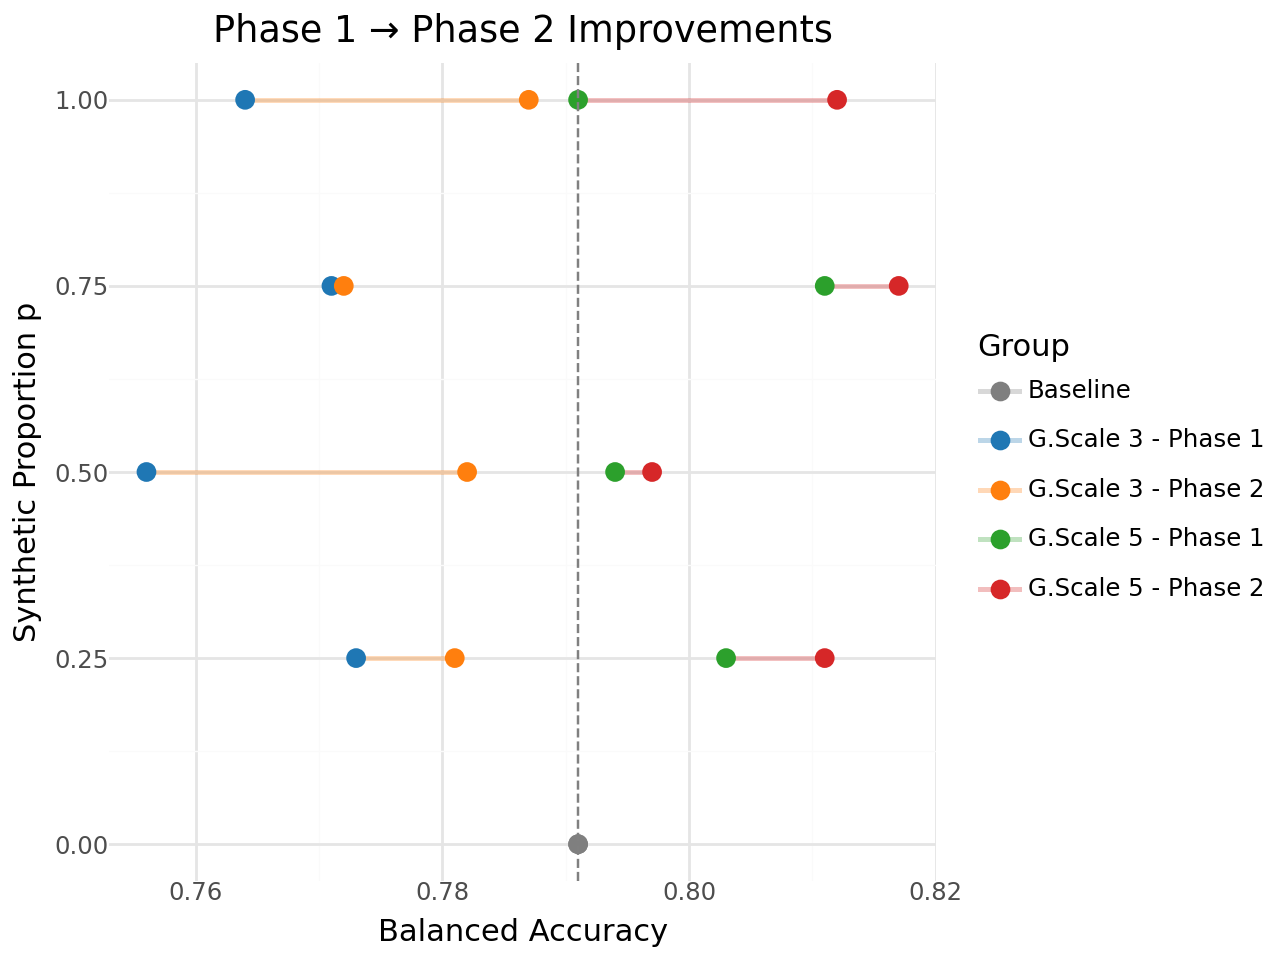

In [11]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_segment, labs, theme_minimal,
    scale_color_manual, geom_vline
)

# Data including baseline (p=0)
data = [
    [3, 0.0, "Baseline", 0.791],
    [5, 0.0, "Baseline", 0.791],

    # G.Scale 3
    [3, 0.25, "Phase 1", 0.773],
    [3, 0.25, "Phase 2", 0.781],
    [3, 0.50, "Phase 1", 0.756],
    [3, 0.50, "Phase 2", 0.782],
    [3, 0.75, "Phase 1", 0.771],
    [3, 0.75, "Phase 2", 0.772],
    [3, 1.0,  "Phase 1", 0.764],
    [3, 1.0,  "Phase 2", 0.787],

    # G.Scale 5
    [5, 0.25, "Phase 1", 0.803],
    [5, 0.25, "Phase 2", 0.811],
    [5, 0.50, "Phase 1", 0.794],
    [5, 0.50, "Phase 2", 0.797],
    [5, 0.75, "Phase 1", 0.811],
    [5, 0.75, "Phase 2", 0.817],
    [5, 1.0,  "Phase 1", 0.791],
    [5, 1.0,  "Phase 2", 0.812],
]

df = pd.DataFrame(data, columns=["GScale", "p", "Phase", "BA"])

# Build new legend labels
def label_row(r):
    if r["Phase"] == "Baseline":
        return "Baseline"
    return f'G.Scale {int(r["GScale"])} - {r["Phase"]}'

df["Group"] = df.apply(label_row, axis=1)

# Segments connecting Phase 1 → Phase 2
df_segments = (
    df[df["Phase"].isin(["Phase 1", "Phase 2"])]
    .pivot(index=["GScale", "p"], columns="Phase", values="BA")
    .reset_index()
)
df_segments["Group"] = df_segments["GScale"].map({
    3: "G.Scale 3 - Phase 2",
    5: "G.Scale 5 - Phase 2"
})

# Legend order & colors
legend_order = [
    "Baseline",
    "G.Scale 3 - Phase 1", "G.Scale 3 - Phase 2",
    "G.Scale 5 - Phase 1", "G.Scale 5 - Phase 2",
]
color_list = [
    "#7f7f7f",   # Baseline
    "#1f77b4",   # G.Scale 3 - Phase 1
    "#ff7f0e",   # G.Scale 3 - Phase 2
    "#2ca02c",   # G.Scale 5 - Phase 1
    "#d62728",   # G.Scale 5 - Phase 2
]

baseline_value = 0.791

combined_plot = (
    ggplot(df, aes(x="BA", y="p", color="Group"))
    + geom_segment(
        df_segments,
        aes(x="Phase 1", xend="Phase 2", y="p", yend="p", color="Group"),
        alpha=0.3, size=1
    )
    + geom_point(size=3)
    + geom_vline(xintercept=baseline_value, linetype="dashed", color="gray")
    + scale_color_manual(values=color_list, limits=legend_order, name="")
    + labs(
        title="Phase 1 → Phase 2 Improvements",
        x="Balanced Accuracy",
        y="Synthetic Proportion p"
    )
    + theme_minimal()
)

# Save as PDF
combined_plot.save("guidance_combined.pdf", width=7, height=4.5)

print(combined_plot)


'guidance_combined_monochrome.pdf'

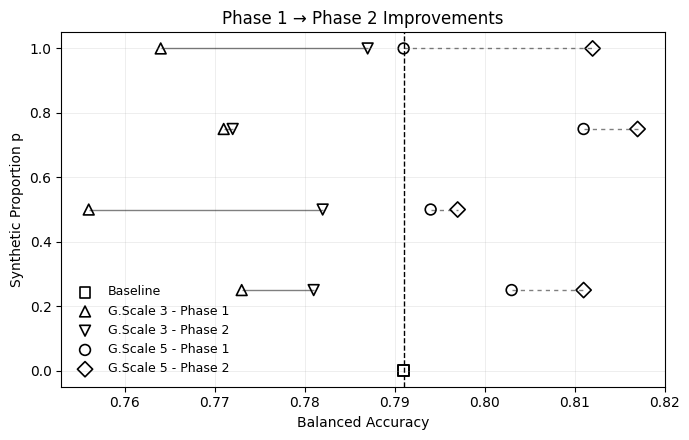

In [9]:
# Monochrome plot using shapes (no color), generated with matplotlib.
# This creates a PDF: /mnt/data/guidance_combined_monochrome.pdf

import pandas as pd
import matplotlib.pyplot as plt

# Data including baseline (p=0)
data = [
    [3, 0.0, "Baseline", 0.791],
    [5, 0.0, "Baseline", 0.791],

    # G.Scale 3
    [3, 0.25, "Phase 1", 0.773],
    [3, 0.25, "Phase 2", 0.781],
    [3, 0.50, "Phase 1", 0.756],
    [3, 0.50, "Phase 2", 0.782],
    [3, 0.75, "Phase 1", 0.771],
    [3, 0.75, "Phase 2", 0.772],
    [3, 1.0,  "Phase 1", 0.764],
    [3, 1.0,  "Phase 2", 0.787],

    # G.Scale 5
    [5, 0.25, "Phase 1", 0.803],
    [5, 0.25, "Phase 2", 0.811],
    [5, 0.50, "Phase 1", 0.794],
    [5, 0.50, "Phase 2", 0.797],
    [5, 0.75, "Phase 1", 0.811],
    [5, 0.75, "Phase 2", 0.817],
    [5, 1.0,  "Phase 1", 0.791],
    [5, 1.0,  "Phase 2", 0.812],
]

df = pd.DataFrame(data, columns=["GScale", "p", "Phase", "BA"])

# Build new legend labels
def label_row(r):
    if r["Phase"] == "Baseline":
        return "Baseline"
    return f'G.Scale {int(r["GScale"])} - {r["Phase"]}'

df["Group"] = df.apply(label_row, axis=1)

# Segments connecting Phase 1 → Phase 2
df_segments = (
    df[df["Phase"].isin(["Phase 1", "Phase 2"])]
    .pivot(index=["GScale", "p"], columns="Phase", values="BA")
    .reset_index()
)

# Marker shapes (monochrome), distinct by Group
marker_map = {
    "Baseline": "s",                # square
    "G.Scale 3 - Phase 1": "^",     # triangle up
    "G.Scale 3 - Phase 2": "v",     # triangle down
    "G.Scale 5 - Phase 1": "o",     # circle
    "G.Scale 5 - Phase 2": "D",     # diamond
}

# Linestyle by G.Scale (still monochrome)
linestyle_map = {3: "-", 5: (0, (3, 3))}  # solid for 3, dashed for 5

baseline_value = 0.791

# Start plotting
fig, ax = plt.subplots(figsize=(7, 4.5))

# Plot segments (Phase 1 → Phase 2) for each (GScale, p)
for _, row in df_segments.iterrows():
    gs = int(row["GScale"])
    y = row["p"]
    x1 = row["Phase 1"]
    x2 = row["Phase 2"]
    ax.hlines(y, xmin=x1, xmax=x2, linestyles=linestyle_map.get(gs, "-"), colors="black", linewidth=1, alpha=0.5)

# Plot points with distinct marker shapes, monochrome outlines
for group, sub in df.groupby("Group"):
    ax.scatter(
        sub["BA"], sub["p"],
        marker=marker_map.get(group, "o"),
        facecolors="none", edgecolors="black", linewidths=1.2, s=60,
        label=group
    )

# Vertical line at baseline BA
ax.axvline(baseline_value, linestyle="--", color="black", linewidth=1)

# Labels and title
ax.set_title("Phase 1 → Phase 2 Improvements", fontsize=12)
ax.set_xlabel("Balanced Accuracy")
ax.set_ylabel("Synthetic Proportion p")

# Legend (single, monochrome)
handles, labels = ax.get_legend_handles_labels()
# order legend items
legend_order = [
    "Baseline",
    "G.Scale 3 - Phase 1", "G.Scale 3 - Phase 2",
    "G.Scale 5 - Phase 1", "G.Scale 5 - Phase 2",
]
order_idx = [labels.index(l) for l in legend_order if l in labels]
ordered_handles = [handles[i] for i in order_idx]
ordered_labels = [labels[i] for i in order_idx]

ax.legend(
    ordered_handles, ordered_labels,
    title="", frameon=False, loc="lower left", fontsize=9
)


ax.grid(True, linewidth=0.5, alpha=0.3)

fig.tight_layout()
out_path = "guidance_combined_monochrome.pdf"
fig.savefig(out_path, bbox_inches="tight")

out_path
